### 1. Feature Selection- Dropping constant features
In this step we will be removing the features which have constant features which are actually not important
for solving the problem statement

##### Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

#### Lets practise on bigger dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [13]:
data=pd.read_csv('C:/Users/krish/OneDrive/Desktop/Kaggle/santander-customer-satisfaction/train.csv')

In [14]:
df = data.copy()
df.shape

(76020, 371)

In [15]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
X=df.drop(labels=['SalePrice'], axis=1)
y=df['SalePrice']

KeyError: "['SalePrice'] not found in axis"

In [17]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 370), (22806, 370))

#### Lets apply the variance threshold

In [18]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [19]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
### Finding non constant features
sum(var_thres.get_support())

332

In [21]:
# Lets Find non-constant features 

X_train.columns[var_thres.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=332)

In [22]:
#constant features
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

38


In [23]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
delta_imp_reemb_var33_1y3
delta_num_reemb_var33_1y3
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_reemb_var33_ult1
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [24]:
#drop constant features
X_train.drop(constant_columns,axis=1, inplace=True)
X_train.shape

(53214, 332)

### 2. Drop Features Using Pearson Correlation

#####  Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

In [25]:
#importing libraries
from sklearn.datasets import load_boston

#Loading the dataset
data1 = load_boston()
df1 = pd.DataFrame(data1.data, columns = data1.feature_names)
df1["MEDV"] = data1.target
print(df1.shape)
df1.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
X = df1.drop("MEDV",axis=1)   #Feature Matrix
y = df1["MEDV"] 
X.shape, y.shape

((506, 13), (506,))

In [27]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [28]:
#correlation b/w independent variables
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


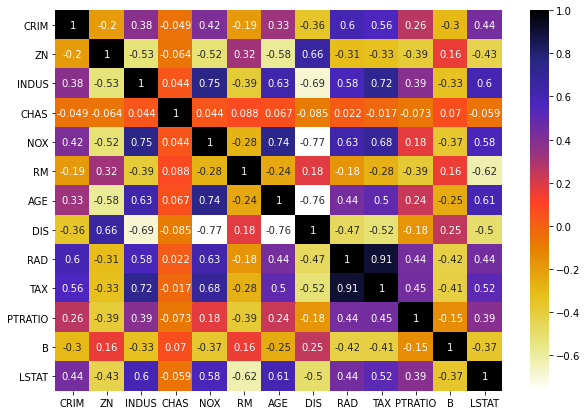

In [29]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(10,7))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(X_train, 0.7)
print(len(set(corr_features)))
corr_features

4


{'AGE', 'DIS', 'NOX', 'TAX'}

In [32]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((354, 9), (152, 9))

### 3. Select Features Using Information Gain For Classification In ML

##### Feature Selection-Information gain - mutual information In Classification Problem Statements

#### Mutual Information 

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [33]:
df2=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
print(df2.shape)
df2.head()

(178, 14)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [35]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.drop(labels=['Wine'], axis=1),
    df2['Wine'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [36]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41413611, 0.30151876, 0.16963235, 0.26888985, 0.1919197 ,
       0.47691872, 0.71429346, 0.13556497, 0.26784888, 0.62574043,
       0.55865313, 0.54462136, 0.53724566])

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714293
Color.int               0.625740
Hue                     0.558653
OD                      0.544621
Proline                 0.537246
Phenols                 0.476919
Alcohol                 0.414136
Malic.acid              0.301519
Acl                     0.268890
Proanth                 0.267849
Mg                      0.191920
Ash                     0.169632
Nonflavanoid.phenols    0.135565
dtype: float64

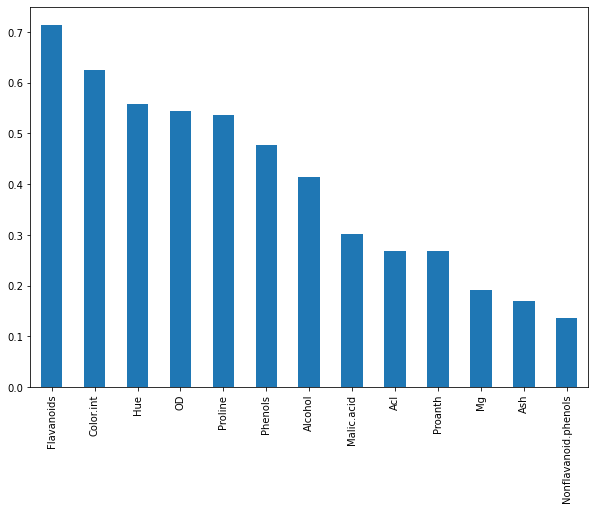

In [38]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 7))

In [39]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

#### Comparion of Univariate And Mutual Information
Comparison of F-test and mutual information
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

### 4. Feature Selection Using Information Gain For Regression In ML

##### Feature Selection-Information gain - mutual information In Regression Problem Statements

#### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [45]:
housing_df = pd.read_csv('C:\\Users\\krish\\OneDrive\\Desktop\\Kaggle\\Advanced-House-Price-Prediction\\train.csv')
print(housing_df.shape)
housing_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
nan = housing_df.isnull().sum()
nan[nan>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [51]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)
print(numerical_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [52]:
housing_df=housing_df[numerical_cols]
print(housing_df.shape)
housing_df.head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [53]:
housing_df=housing_df.drop("Id",axis=1)

In [54]:
### It is always a good practice to split train and test data to avoid overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [55]:
X_train.isnull().sum()[X_train.isnull().sum()>0].sort_values(ascending=False)

LotFrontage    189
GarageYrBlt     54
MasVnrArea       5
dtype: int64

In [56]:
from sklearn.feature_selection import mutual_info_regression

# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.24347686, 0.20258753, 0.16509948, 0.53150853, 0.11140866,
       0.35262394, 0.2469683 , 0.10348914, 0.16357309, 0.        ,
       0.11143124, 0.38334143, 0.31066956, 0.22739212, 0.00975267,
       0.48372051, 0.03088767, 0.00201981, 0.2720237 , 0.08310696,
       0.03826595, 0.03776261, 0.17710012, 0.18620772, 0.269594  ,
       0.38291456, 0.36821821, 0.06945653, 0.17417481, 0.00532613,
       0.00488285, 0.02284256, 0.        , 0.00534759, 0.        ,
       0.00773134])

In [57]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.531509
GrLivArea        0.483721
TotalBsmtSF      0.383341
GarageCars       0.382915
GarageArea       0.368218
YearBuilt        0.352624
1stFlrSF         0.310670
FullBath         0.272024
GarageYrBlt      0.269594
YearRemodAdd     0.246968
MSSubClass       0.243477
2ndFlrSF         0.227392
LotFrontage      0.202588
Fireplaces       0.186208
TotRmsAbvGrd     0.177100
OpenPorchSF      0.174175
LotArea          0.165099
BsmtFinSF1       0.163573
BsmtUnfSF        0.111431
OverallCond      0.111409
MasVnrArea       0.103489
HalfBath         0.083107
WoodDeckSF       0.069457
BedroomAbvGr     0.038266
KitchenAbvGr     0.037763
BsmtFullBath     0.030888
ScreenPorch      0.022843
LowQualFinSF     0.009753
YrSold           0.007731
MiscVal          0.005348
EnclosedPorch    0.005326
3SsnPorch        0.004883
BsmtHalfBath     0.002020
BsmtFinSF2       0.000000
MoSold           0.000000
PoolArea         0.000000
dtype: float64

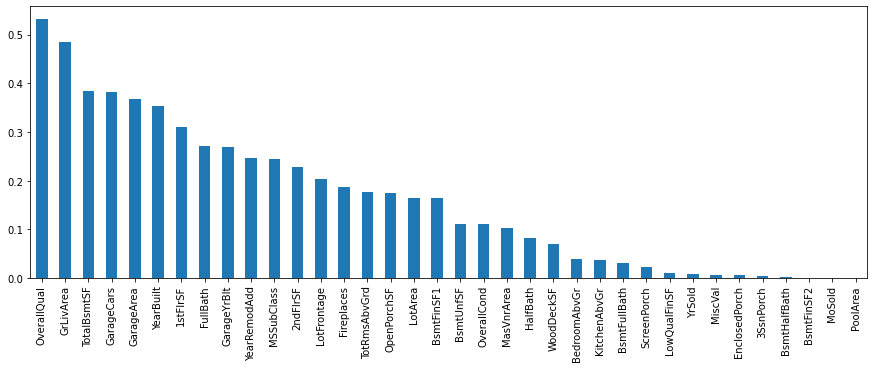

In [58]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [60]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002D8ABB0E430>)

In [61]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [62]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

##### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)


As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

### 5. Feature Selection Using Chi2 Statistical Analysis

##### Fisher Score- Chisquare  Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [66]:
import seaborn as sns
titanic_df =sns.load_dataset('titanic')
print(titanic_df.shape)
titanic_df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [67]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [68]:
##['sex','embarked','alone','pclass','Survived']
titanic_df=titanic_df[['sex','embarked','alone','pclass','survived']]
titanic_df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [71]:
titanic_df['sex']=np.where(titanic_df['sex']=="male",1,0)
titanic_df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [85]:
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(titanic_df['embarked'].unique(), 0)}
titanic_df['embarked'] = titanic_df['embarked'].map(ordinal_label)
titanic_df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [86]:
### let's perform label encoding on alone
titanic_df['alone']=np.where(titanic_df['alone']==True,1,0)
titanic_df.head()


,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [88]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(titanic_df[['sex','embarked','alone','pclass']],
                                              titanic_df['survived'],test_size=0.3,random_state=100)
X_train.shape, X_test.shape

((623, 4), (268, 4))

In [89]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue

from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [91]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

##### Observation 
Sex Column is the most important column when compared to the output feature
Survived